In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\100 Days machine learning\Polynomial Logistic Regression day 60\1.ushape.csv")

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [6]:
df.rename(columns={'3.159499363321345566e-02':'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'Class'},inplace=True)

In [7]:
df

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

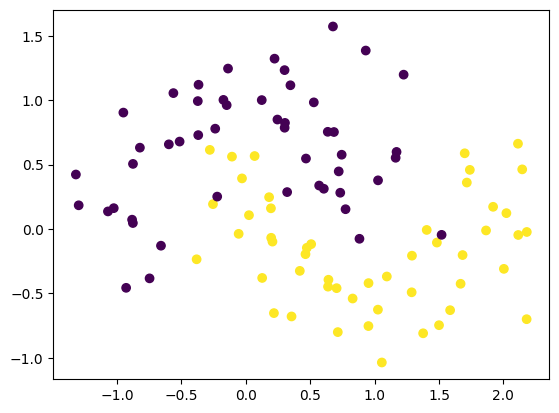

In [9]:

plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf=LogisticRegression()

In [12]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

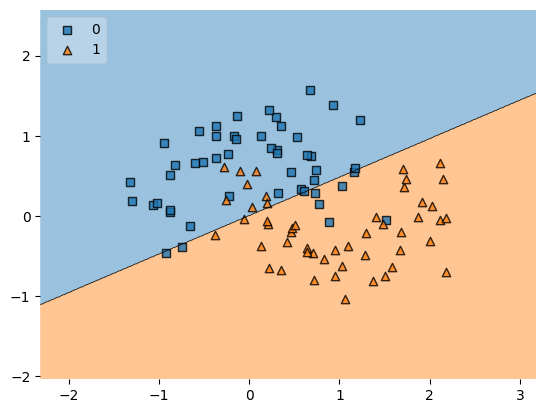

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [14]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly=PolynomialFeatures(degree=3,include_bias=True)

In [17]:
X_trf = poly.fit_transform(X)

In [18]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.9099999999999999)

In [19]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

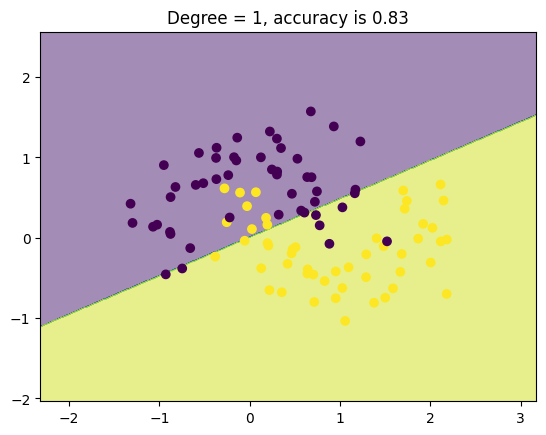

In [20]:

plot_decision_boundary(X,y)

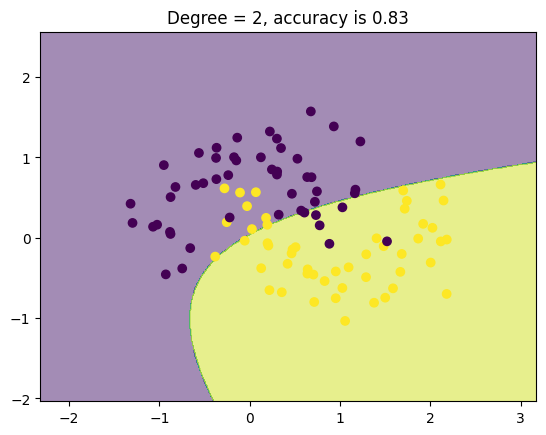

In [21]:
plot_decision_boundary(X,y,degree=2)

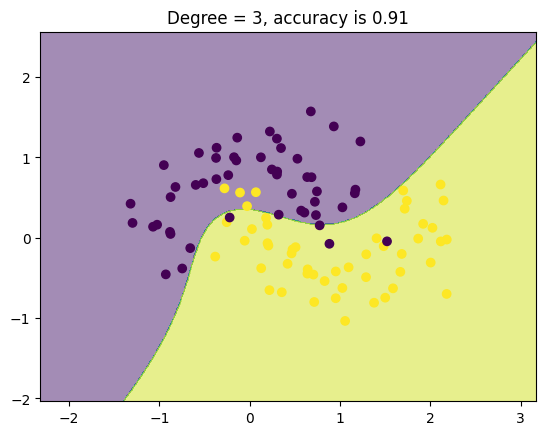

In [22]:
plot_decision_boundary(X,y,degree=3)

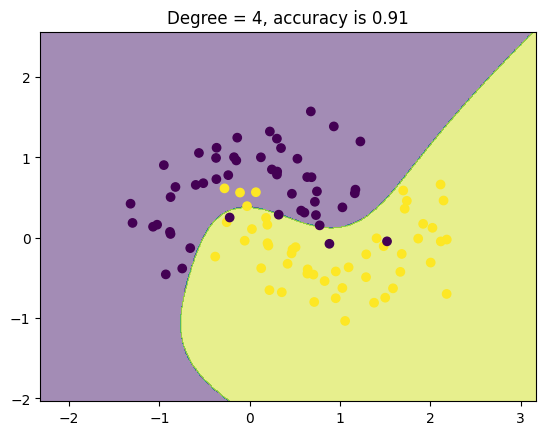

In [23]:
plot_decision_boundary(X,y,degree=4)

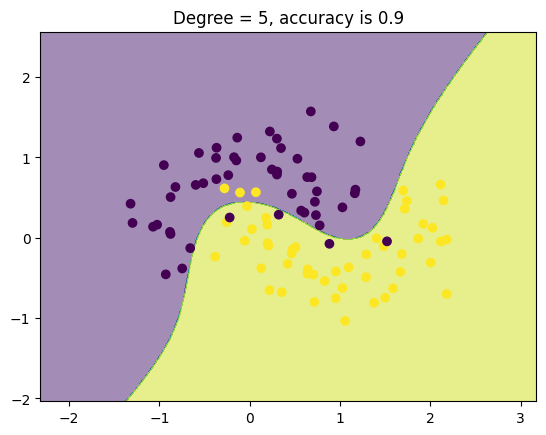

In [24]:

plot_decision_boundary(X,y,degree=5)

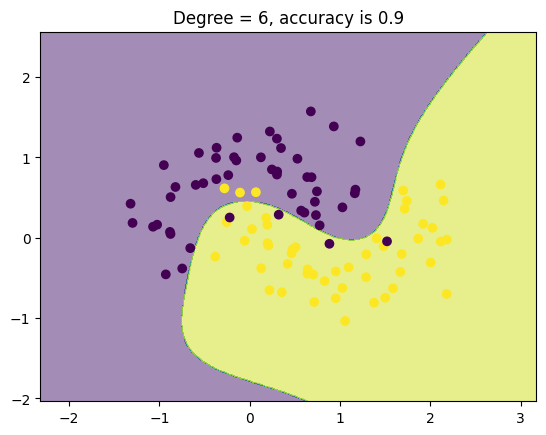

In [25]:

plot_decision_boundary(X,y,degree=6)